# 备注：f19011632詹康宁-网店数据可视化分析

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series, DataFrame
import openpyxl
import seaborn as sns
import pyecharts.charts as pyc
import pyecharts.options as opts
# 作图的字体默认设置
fontdict = {'fontsize': 15,'horizontalalignment': 'center'}
import matplotlib
font = {'family': 'Microsoft Yahei'}
matplotlib.rc('font', **font)

# 1.数据导入

In [33]:
df = pd.read_excel("OnlineShopData.xlsx",engine="openpyxl")

In [48]:
df.head(1)

,实际发货天数,是否按时发货,发货天数,销售预测,记录数,产品 ID,产品名称,利润,发货日期,国家,...,数量,是否退回,省/自治区,类别,细分,行 ID,计划发货天数,订单 ID,订单日期,销售额
0,6,发货按时,0,509.8632,1,办公用-纸张-10000928,"Eaton 令, 每包 12 个",183.12,2016-01-01,中国,...,4,1,辽宁,办公用品,公司,9760,6,US-2012-4853457,2016-01-01,572.88


# 2.数据可视化

## 2.1各省（自治区）利润

In [35]:
result1 = df.groupby(by=[df['省/自治区']])['利润'].sum()
result1 = Series.sort_values(result1)
total_profit_city = list(result1)
city = list(result1.index)

In [137]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

total_profit = (
    Map()
    .add("利润", [list(z) for z in zip(city,total_profit_city)], "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="f19011632詹康宁-各地区利润",subtitle="按地区汇总(不考虑利润为负的地区)"),
        visualmap_opts=opts.VisualMapOpts(split_number=10, is_piecewise=True,pieces=[
        {"min": 300000},
        {"min": 100000, "max": 299999},
        {"min": 10000, "max": 99999},
        {"min": 0, "max": 9999}],
        )
    )
)
total_profit.render_notebook()

>从图中可以看出广东和山东利润比较高，超过30万元,其中未着色地区利润为负数

## 2.2 各省（自治区）销售额

In [41]:
result2 = df.groupby(by=[df['省/自治区']])['销售额'].sum()
result2 = Series.sort_values(result2)
turnover_city = list(result2)
city = list(result2.index)

In [138]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

total_turnover = (
    Map()
    .add("销售额", [list(z) for z in zip(city,turnover_city)], "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各地区销售额"),
        visualmap_opts=opts.VisualMapOpts(split_number=10, is_piecewise=True,pieces=[
        {"min": 1500000},
        {"min": 1000000, "max": 1499999},
        {"min": 500000, "max": 999999},
        {"min": 100000, "max": 499999}],
        )
    )
)
total_turnover.render_notebook()

>从图中可以看出山东销售额比较高，超过150万元

## 2.3 每日利润(日历图)

In [49]:
result3 = df.groupby(by=[df['订单日期']])['利润'].sum()
result3 = Series.sort_values(result3)
result3 = result3.tail(365)
total_profit_day = list(result3)
day = list(result3.index)

In [76]:
import random
import datetime

import pyecharts.options as opts
from pyecharts.charts import Calendar


begin = datetime.date(2018, 12, 16)
end = datetime.date(2019, 6, 6)
data = [list(z) for z in zip(day,total_profit_day)]

In [139]:
profit_day=(
    Calendar(init_opts=opts.InitOpts(width="900px", height="300px"))
    .add(
        series_name="日利润",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="120",
            pos_left="30",
            pos_right="30",
            range_="2017",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="30", pos_left="center", title="f19011632詹康宁-2018-2019年日利润情况"),
        visualmap_opts=opts.VisualMapOpts(
            max_=10000, min_=2000, orient="horizontal", is_piecewise=False
        ),
    )
)
profit_day.render_notebook()

>可以看出日利润很少大于10000元，利润为5000左右的数据较多

## 2.4年销量趋势

In [80]:
df['订单日期'] = pd.to_datetime(df["订单日期"].astype('str'))

In [81]:
count_ID = df['订单 ID'].nunique()
print("订单数：", count_ID)

订单数： 2766


In [82]:
# 根据年月查看销量趋势
# 根据年分组
year_item = df[['订单 ID', '订单日期', '数量']].groupby(by=df['订单日期'].dt.year)['数量'].sum()
# 各年季度销量情况
year_quarter_item = df[['订单 ID', '订单日期', '数量']].groupby(by=[df['订单日期'].dt.year, df['订单日期'].dt.quarter])['数量'].sum()
# 根据年月分组
year_month_item = df[['订单 ID', '订单日期', '数量']].groupby(by=[df['订单日期'].dt.year, df['订单日期'].dt.month])['数量'].sum()

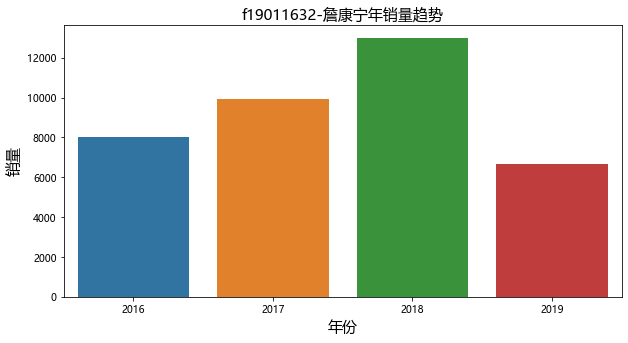

<Figure size 432x288 with 0 Axes>

In [140]:
# 各年销量情况
plt.figure(figsize=(10, 5))
sns.barplot(x=year_item.index, y=year_item.values)
plt.title("f19011632-詹康宁年销量趋势", fontdict=fontdict)
plt.xlabel("年份", fontdict=fontdict)
plt.ylabel("销量", fontdict=fontdict)
plt.show()
plt.savefig('a.png')

>2016/1/1-2019/12/29期间总销量是37590件，从上图我们可以看出网店市场销量整体呈现上升趋势，但是波动较大。

## 2.5 销售额预测值与实际销售额

In [85]:
df.head(1)

,实际发货天数,是否按时发货,发货天数,销售预测,记录数,产品 ID,产品名称,利润,发货日期,国家,...,数量,是否退回,省/自治区,类别,细分,行 ID,计划发货天数,订单 ID,订单日期,销售额
0,6,发货按时,0,509.8632,1,办公用-纸张-10000928,"Eaton 令, 每包 12 个",183.12,2016-01-01,中国,...,4,1,辽宁,办公用品,公司,9760,6,US-2012-4853457,2016-01-01,572.88


In [119]:
import datetime
df2 = df.tail(20)
pre_turnover = list(df2["销售预测"])
turnover = list(df2["销售额"])
df['订单日期'].astype('datetime64')
x= [x for x in range(21)]

In [141]:
import pyecharts.options as opts
from pyecharts.charts import Line


predict= (
    Line()
    .add_xaxis(x)
    .add_yaxis("预测值",pre_turnover)
    .add_yaxis("销售额",turnover,symbol="triangle")
    .set_series_opts(
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="f19011632詹康宁-销售预测值和实际预测额"),
        xaxis_opts=opts.AxisOpts(
            axistick_opts=opts.AxisTickOpts(is_align_with_label=True),
            is_scale=False,
            boundary_gap=False,
            axislabel_opts={"rotate":50},
        ),
    )
)
predict.render_notebook()


>从对比结果可以看出，预测值基本接近实际值

## 2.6 不同种类商品的销售数量（Time图）

In [127]:
year_classify_item = df[['订单 ID', '订单日期', '数量']].groupby(by=[df['订单日期'].dt.year, df['类别']])['数量'].sum()

In [128]:
year_classify_item

订单日期  类别  
2016  办公用品    4534
      家具      1915
      技术      1579
2017  办公用品    5663
      家具      2100
      技术      2157
2018  办公用品    7424
      家具      2956
      技术      2609
2019  办公用品    3813
      家具      1534
      技术      1306
Name: 数量, dtype: int64

In [143]:
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Bar, Page, Pie, Timeline
def timeline_pie() -> Timeline:
    t1 = Timeline()
    things = ["办公用品","家具","技术"]
    for i in range(2016, 2020):
        if i==2016:
            bar1=(
                Bar()
                .add_xaxis(things)
                .add_yaxis('f19011632詹康宁-2016各根类别销售数量',Series.to_list(year_classify_item[i]))
              )
            #t1.add(bar1,"{}年".format(i)) 
        if i==2017:
            bar1=(
                Bar()
                .add_xaxis(things)
                .add_yaxis('f19011632詹康宁-2017类别销售数量',Series.to_list(year_classify_item[i]))
            )
            #t1.add(bar1,"{}年".format(i)) 
        if i==2018:
            bar1=(
                Bar()
                .add_xaxis(things)
                .add_yaxis('f19011632詹康宁-2018类别销售数量',Series.to_list(year_classify_item[i]))
            )
            #t1.add(bar1,"{}年".format(i)) 
        if i==2019:
            bar1=(Bar()
                    .add_xaxis(things)
                    .add_yaxis('f19011632詹康宁-2019类别销售数量',Series.to_list(year_classify_item[i]))
                 )
        t1.add(bar1,"{}年".format(i))   
    return t1
timeline_pie().render_notebook()

>如图，通过调整Time选项，可以查看每年三种类型商品的销售量

## 2.7 数据大屏

In [135]:
def total_profit()->Map:
    total_profit = (
        Map()
        .add("利润", [list(z) for z in zip(city,total_profit_city)], "china")
        .set_global_opts(
            title_opts=opts.TitleOpts(title="各地区利润",subtitle="按地区汇总(不考虑利润为负的地区)"),
            visualmap_opts=opts.VisualMapOpts(split_number=10, is_piecewise=True,pieces=[
            {"min": 300000},
            {"min": 100000, "max": 299999},
            {"min": 10000, "max": 99999},
            {"min": 0, "max": 9999}],
            )
        )
    )
    return total_profit
def profit_day()->Calendar:
    profit_day=(
        Calendar(init_opts=opts.InitOpts(width="900px", height="300px"))
        .add(
            series_name="日利润",
            yaxis_data=data,
            calendar_opts=opts.CalendarOpts(
                pos_top="120",
                pos_left="30",
                pos_right="30",
                range_="2017",
                yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
            ),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(pos_top="30", pos_left="center", title="2018-2019年日利润情况"),
            visualmap_opts=opts.VisualMapOpts(
                max_=10000, min_=2000, orient="horizontal", is_piecewise=False
            ),
        )
    )
    return profit_day
def total_turnover()->Map:
    total_turnover = (
        Map()
        .add("销售额", [list(z) for z in zip(city,turnover_city)], "china")
        .set_global_opts(
            title_opts=opts.TitleOpts(title="各地区销售额"),
            visualmap_opts=opts.VisualMapOpts(split_number=10, is_piecewise=True,pieces=[
            {"min": 1500000},
            {"min": 1000000, "max": 1499999},
            {"min": 500000, "max": 999999},
            {"min": 100000, "max": 499999}],
            )
        )
    )
    return total_turnover
def predict()->Line:
    predict= (
        Line()
        .add_xaxis(x)
        .add_yaxis("预测值",pre_turnover)
        .add_yaxis("销售额",turnover,symbol="triangle")
        .set_series_opts(
            areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
            label_opts=opts.LabelOpts(is_show=False),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="销售预测值和实际预测额"),
            xaxis_opts=opts.AxisOpts(
                axistick_opts=opts.AxisTickOpts(is_align_with_label=True),
                is_scale=False,
                boundary_gap=False,
                axislabel_opts={"rotate":50},
            ),
        )
    )
    return predict


In [136]:
from pyecharts.charts import Page
page = Page(layout=Page.DraggablePageLayout, page_title="网店数据可视化分析")
# 在页面中添加图表
page.add(
    total_profit(),
    profit_day(),
    predict(),
    timeline_pie() ,
    total_turnover(),)
page.render('网店数据大屏.html')

'C:\\Users\\Soulyou\\Desktop\\可视化期末报告\\网店数据大屏.html'

## 2.8 2019年季度数据

In [130]:
year_item

订单日期
2016     8028
2017     9920
2018    12989
2019     6653
Name: 数量, dtype: int64

In [131]:
def quarterData(trade: pd.DataFrame, low: tuple, high: tuple) -> list:
    """
    输入日期型字符串,返回日期范围内的销量和用户量
    """
    from datetime import datetime
    low = datetime.strptime(low, "%Y/%m/%d")
    high = datetime.strptime(high, "%Y/%m/%d")
    trade_low = df[(df['订单日期'] >= datetime(low.year, low.month, low.day)) & (
        df['订单日期'] <= datetime(high.year, high.month, high.day))]
    group_low = trade_low[['订单 ID', '订单日期', '数量']].groupby(
        by=[df['订单日期'].dt.month, df['订单日期'].dt.day])
    mount = group_low['数量'].sum()
    user = group_low['订单 ID'].nunique()

    return [mount, user]

In [132]:
def lineMountUser(mount, user, title):
    """
    输入销量和用户量数据以及标题，生成折线图
    """
    plot = pyc.Line().add_xaxis(xaxis_data=[str(x[0])+"/"+str(x[1]) for x in mount.index]
                                ).add_yaxis(series_name="销量", y_axis=[int(x) for x in mount.values], markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(name='当月销量均值', type_="average")])
                                            ).add_yaxis(series_name="用户量", y_axis=[int(x) for x in user.values], markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(name='当月用户量量均值', type_="average")])
                                                        ).set_series_opts(label_opts=opts.LabelOpts(is_show=False)
                                                                          ).set_global_opts(title_opts=opts.TitleOpts(title=title), toolbox_opts=opts.ToolboxOpts(), tooltip_opts=opts.TooltipOpts(trigger='axis')
                                                                                            ).render_notebook()
    return plot

In [133]:
mount_2019_1_quarter = quarterData(df, "2019/1/1", "2019/3/31")[0]
user_2019_1_quarter = quarterData(df, "2019/1/1", "2019/3/31")[1]
mount_2019_2_quarter = quarterData(df, "2019/4/1", "2019/6/30")[0]
user_2019_2_quarter = quarterData(df, "2019/4/1", "2019/6/30")[1]
mount_2019_3_quarter = quarterData(df, "2019/7/1", "2019/9/30")[0]
user_2019_3_quarter = quarterData(df, "2019/7/1", "2019/9/30")[1]
mount_2019_4_quarter = quarterData(df, "2019/10/1", "2019/12/31")[0]
user_2019_4_quarter = quarterData(df, "2019/10/1", "2019/12/31")[1]
mount_2019 = [mount_2019_1_quarter ,mount_2019_2_quarter ,mount_2019_3_quarter ,mount_2019_4_quarter ]
user_2019 = [user_2019_1_quarter ,user_2019_2_quarter ,user_2019_3_quarter ,user_2019_4_quarter ]

In [134]:
Q1_2019 = lineMountUser(mount_2019_1_quarter, user_2019_1_quarter, "2019年第一季度销量")
Q2_2019 = lineMountUser(mount_2019_2_quarter, user_2019_2_quarter, "2019年第二季度销量")
Q3_2019 = lineMountUser(mount_2019_3_quarter, user_2019_3_quarter, "2019年第三季度销量")
Q4_2019 = lineMountUser(mount_2019_4_quarter, user_2019_4_quarter, "2019年第四季度销量")

In [21]:
Q1_2019

In [22]:
Q2_2019

In [23]:
Q3_2019

In [24]:
Q4_2019